<a href="https://colab.research.google.com/github/Tony-Jaime02/Banana_Convolution-Neural-Network/blob/main/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segunda CNN

Cambios realizados
    
    -->Ajuste del tamaño de imagen de 250x250 a 512x512 
    -->Epocas de traning 10 -> 15
    -->Se agrego una nueva capa de neurona
        model.add(layers.Dense(40,activation='relu'))
    -->

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

import tensorflow as tfa
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

In [3]:
%cd "/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset"

base_dir = 'Fruits'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 15,
							zoom_range = 0.3,
							horizontal_flip = True,
							brightness_range=[0.7,0.9],
							vertical_flip=True,
							)
							
val_datagen = ImageDataGenerator(1./255)


train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (512, 512),
							batch_size = 6,
							class_mode ='categorical')


val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (512, 512),
							batch_size = 6, #Cada cuantos ejemplos se actualiza la epoca
							#step_per_epoch Cada cuantos batches son una epoca
							class_mode= 'categorical')

conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (512,512,3))

/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset
Found 264 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
58889256/58889256 [==============================] - 1s 0us/step


In [4]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(40,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))


conv_base.trainable = False

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(lr=2e-5),
						metrics=['acc'])

history = model.fit(train_generator, 
				steps_per_epoch = 10,
				epochs = 15, 
				validation_data = val_generator, 
				validation_steps = 10)
				


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 120)               15728760  
                                                                 
 dense_1 (Dense)             (None, 40)                4840      
                                                                 
 dense_2 (Dense)             (None, 3)                 123       
                                                                 
Total params: 30,448,411
Trainable params: 15,733,723
Non-trainable params: 14,714,688
_________________________________________________________________


Epoch 1/15
10/10 [==============================] - ETA: 0s - loss: 24.1755 - acc: 0.3333 

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


10/10 [==============================] - 426s 45s/step - loss: 24.1755 - acc: 0.3333 - val_loss: 101.6019 - val_acc: 0.4167
Epoch 2/15
10/10 [==============================] - 414s 43s/step - loss: 4.7340 - acc: 0.5167 - val_loss: 27.6858 - val_acc: 0.3500
Epoch 3/15
10/10 [==============================] - 477s 50s/step - loss: 3.0167 - acc: 0.5000 - val_loss: 18.1382 - val_acc: 0.5500
Epoch 4/15
10/10 [==============================] - 412s 43s/step - loss: 4.4736 - acc: 0.3833 - val_loss: 13.4711 - val_acc: 0.5167
Epoch 5/15
10/10 [==============================] - 410s 43s/step - loss: 2.7320 - acc: 0.5000 - val_loss: 32.4674 - val_acc: 0.5333
Epoch 6/15
10/10 [==============================] - 411s 43s/step - loss: 2.7356 - acc: 0.4500 - val_loss: 23.8861 - val_acc: 0.4833
Epoch 7/15
10/10 [==============================] - 413s 43s/step - loss: 2.6168 - acc: 0.4167 - val_loss: 12.1349 - val_acc: 0.6500
Epoch 8/15
10/10 [==============================] - 488s 52s/step - loss: 1.99

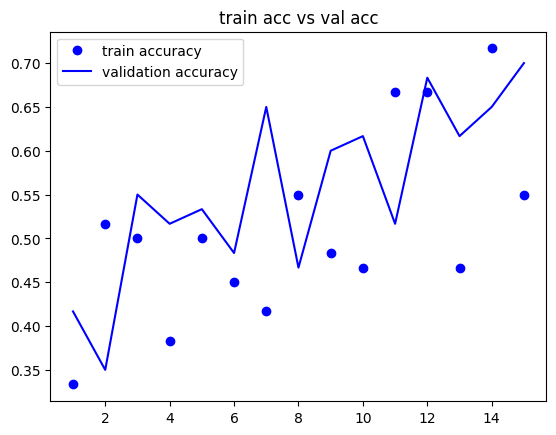

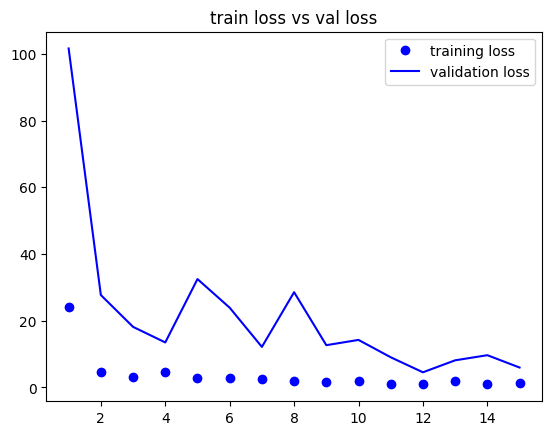

Found 75 images belonging to 3 classes.


<ipython-input-5-24ba5255ed19>:31: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps = 1)



test acc :
 0.6800000071525574


In [5]:
model.save('bananas.h5')
			
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (512, 512),
					batch_size = 75,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 1)
print('\ntest acc :\n', test_acc)

#Matriz de confusión

3/3 [==============================] - 246s 71s/step
[[17  7  2]
 [ 6 21  0]
 [ 6  3 13]]


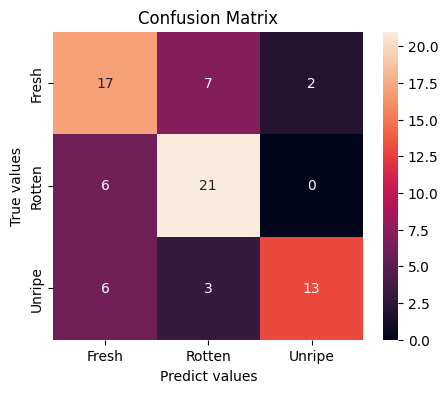

In [6]:
y_test = test_generator[0][0]
y = test_generator[0][1]
y_label = np.argmax(y, axis=1)

#print(y_label)

y_pred = model.predict(y_test)
y_pred_label = np.argmax(y_pred, axis=1)

#print(y_pred)
#print(y_pred_label)

cm = confusion_matrix(y_label, y_pred_label, labels=[0,1,2])
print(cm)

cm_df = pd.DataFrame(cm, index = ['Fresh', 'Rotten', 'Unripe'], columns = ['Fresh', 'Rotten', 'Unripe'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True values')
plt.xlabel('Predict values')
plt.show()